<a href="https://colab.research.google.com/github/0530hwi/KaggleStudy/blob/main/K_%ED%8F%89%EA%B7%A0_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 소개

- 이번 강의에서는 비지도학습 알고리즘을 사용한다.
    - 비지도학습 알고리즘은 예측값이 없다. 
    - 대신 데이터의 일부 속성을 학습하고 특정 방식으로 기능의 구조를 나타내는 것이다.
    - 예측을 위한 Feature engineering 맥락에서 비지도학습 알고리즘을 "feature discovery technique"라고 부르기도 한다.

- 군집화는 단순히 포인트(데이터)가 얼마나 유사한지에 따라 포인트를 그룹에 할당하는 것을 의마한다.

- Feature engineering을 사용할 때, 시장 부문을 대표하는 고객 그룹 또는 유사한 날씨 패턴을 나타내는 지리적 영역을 사용할 수 있다.
- 클러스터 레이블의 기능을 추가하면 기계 학습 모델이 공간 또는 근접성의 복잡한 관계를 푸는 데 도움이 된다.

---

# Cluster Labels as a Feature

- 단일 실수 값 피쳐에 적용되는 클러스터링은 기존의 비닝(binning) 또는 이산화(discretization) 변환 처럼 작동한다.

- Multiple features 의 경우는 "multi-dimensional binning" 처럼 작동하고, 벡터 양자화(vector quantization)

<figure style="padding: 1em;">
<img src="https://i.imgur.com/sr3pdYI.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center><strong>Left:</strong> Clustering a single feature. <strong>Right:</strong> Clustering across two features.
</center></figcaption>
</figure>


데이터 프레임에 추가된 클러스터 레이블의 기능은 다음과 같다.


| Longitude | Latitude | Cluster |
|-----------|----------|---------|
| -93.619   | 42.054   | 3       |
| -93.619   | 42.053   | 3       |
| -93.638   | 42.060   | 1       |
| -93.602   | 41.988   | 0       |

---

# 비닝(binning) ?

- 연속형 변수가 범주화되면 디테일한 데이터의 정보는 사라진다.
    - 예를 들어, 시험성적이 96점인 학생이 A학점을 받았다. A학점은 90점으로 다른 A 학점을 받은 학생과 동일하게 인식되지만, 두 학생의 성적 우열은 엄연히 존재한다.

    - 모든 경우는 아니고, 연속형 변수를 비닝하면, 데이터 분포에 따라서 이상치(outliers)로 발생할 수 있는 이슈를 회피하거나 과적합(over fitting)을 완화시켜주기도 한다.

    - 특히 금융권에서 사용하는 스코어카드 기법에서는 연속형 변수를 범주형 변수로 변환하는 작업을 빈번히 사용한다.

---

[비닝에 대하여](https://choonghyunryu.github.io/post/2021-02/binning/)


비닝을 쉽게 이해하려면 히스토그램을 떠올리면 된다.

연속형 변수를 일정한 간격으로 나누어 계급(class)을 만든 후 해당하는 계급의 구간(class interval)에 몇 개의 관측치가 포함되는지 집계한 것이 도수분포표(frequency table)다. 

그리고 계급 구간별로 도수를 막대의 높이로 표현한 것이 히스토그램(histogram)이다. 

원래의 데이터를 데이터가 포함된 계급에 매핑하는 범주화하는 이 작업도 비닝의 한 방법이다.

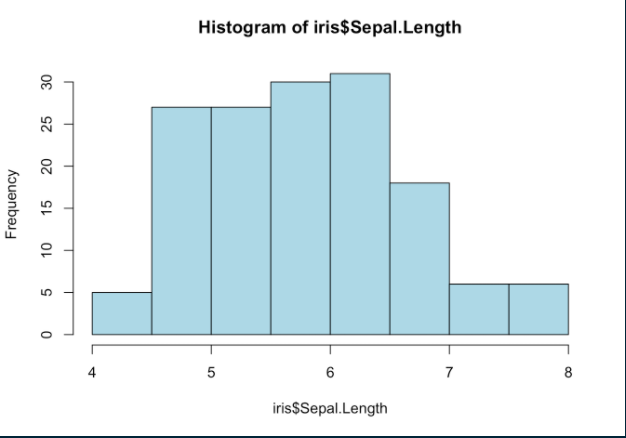



---

`Cluster feature`는 범주형이라는 것을 기억하는 것이 중요!

일반적인 클러스터링 알고리즘이 생성하는 레이블 인코딩으로 표시된다. (모델에 따라 원-핫 인코딩이 더 적합할 수 있다.)

- 클러스터 레이블을 추가하는 아이디어는 클러스터가 기능간의 복잡한 관계를 더 간단한 '청크'로 분해한다는 것이다. 
    - 청크를 이용하면 복잡한 모델을 한번에 학습하는 대신 간단한 청크를 하나씩 학습할 수 있다. 
    > "divide and conquer" strategy (분할 정복 전략)

<figure style="padding: 1em;">
<img src="https://i.imgur.com/rraXFed.png" width=800, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Clustering the YearBuilt feature helps this linear model learn its relationship to SalePrice.
</center></figcaption>
</figure>

- 위 그림은 군집화가 간단한 선형 모델을 개선하는 방법을 보여준다. 'YearBuilt'와 'SalePrice` 사이의 곡 관계는 너무 복잡하다. 그러나 더 작은 청크에서는 관계가 거의 선형이며 모델이 쉽게 학습할 수 있다.

# 청크? [청크](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=rockeduco&logNo=220722739006)

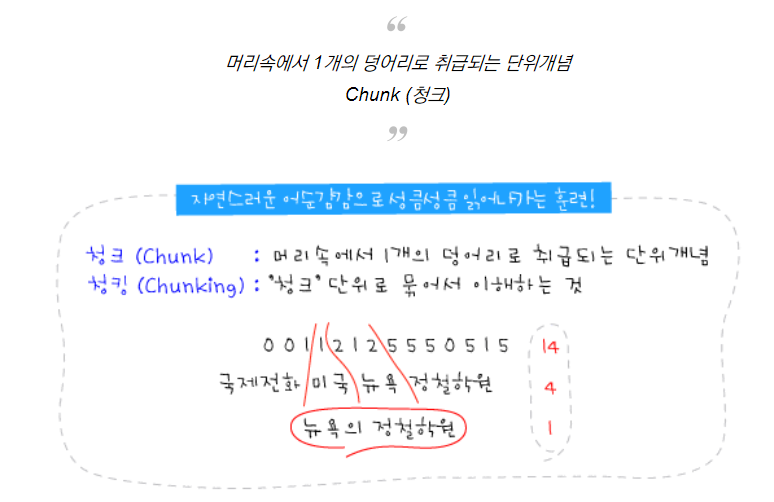

# k-Means Clustering

- 클러스터링 알고리즘은 매우 많다. 주로 "유사성" 또는 "근접성"을 측정하는 방법과 함께 작동하는 기능의 종류에 따라 다르다.

- 우리가 사용할 알고리즘, k-평균 군집화 알고리즘은 직관적이고 Feature Engineering context에서 적용하기가 쉽다.

- k-평균 군집화는 일반 직선 거리(유클리드 거리)를 사용하여 유사성을 측정한다. 
    - 중심점이라고 하는 여러 점을 피쳐 공간 내부에 배치하여 클러스터를 작성한다.
    - 데이터의 집합의 각 점은 해당 점이 가장 가까운 중심의 클러스터에 할당된다. 
    - **k**는 생성되는 중심(군집)의 수이다.


<figure style="padding: 1em;">
<img src="https://i.imgur.com/KSoLd3o.jpg.png" width=450, alt="">
<figcaption style="textalign: center; font-style: italic"><center>K-means clustering creates a Voronoi tessallation of the feature space.
</center></figcaption>
</figure>

# 표준 알고리즘의 실행 과정
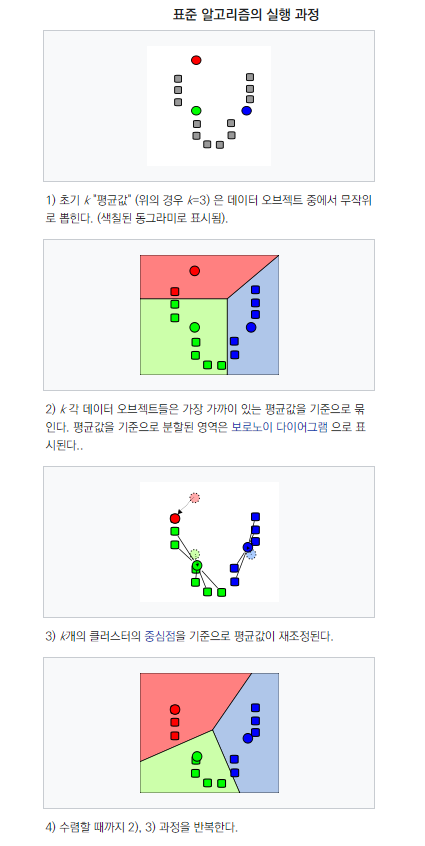


# k-평균 알고리즘 학습하는 방법 및 기능

- `scikit-learn` 에서 `n_clusters`, `max_iter`, `n_init`의 세가지 매개변수를 중점적으로 살펴보자!

1. 먼저, 중심 수(`n_cluster`)를 랜덤하게 초기화하는 것으로 시작한다. 

2. 가장 가꾼 군집 중심에 점을 할당한다.
    - 각 중심을 이동하여 해당 점까지의 거리를 최소화한다.
    - 중심선이 더 이상 이동하지 않거나 일부 최대 반복 횟수('max_iter')가  지날 때 까지 이 두 단계에서 반복된다.

3. 중심체 초기 랜덤 위치는 불량한 군집화로 끝나는 경우가 있는데, 이러한 경우를 방지하기 위해 여러 번('n_init')로 반복하고 각 점과 최적 군집화인 중심 사이의 총 거리가 가장 작은 군집을 반환한다.

아래 에니메이션은 알고리즘의 작동 상태를 보여준다.

초기 중심점에 대한 결과의 의존성과 수렴까지 반복하는 것의 중요성을 보여준다.

<figure style="padding: 1em;">
<img src="https://i.imgur.com/tBkCqXJ.gif" width=550, alt="">
<figcaption style="textalign: center; font-style: italic"><center>The K-means clustering algorithm on Airbnb rentals in NYC.
</center></figcaption>
</figure>

# 일반적인 군집분석과의 차이점?

- k-평균 군집분석(최적분리 군집방법)의 경우 연구자에 의해 군집의 개수가 미리 결정되어 있어야 한다.
    - 계보적인 방법에서 초기에 부적절한 병합 또는 분리가 일어났을 때 회복될 수 없다는 단점을 최적분리 방법에서는 **개체의 재할당**을 통해 극복할 수 있다.

- k-평균 군집분석은 이상치에 굉장히 민감하기 때문에, 데이터 전처리 과정에서 이상치에 대한 고려를 심도 있게 해야한다.